**Daniel Yu**

Spring 2024

CS 251 / 252: Data Analysis and Visualization

Project 4: Principal Component Analysis

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import pca

plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Task 4: Eigenfaces — PCA on face images

Here, you will implement the Eigenface algorithm, which involves performing PCA on images of human faces. Here is a [link](https://sites.cs.ucsb.edu/~mturk/Papers/jcn.pdf) to original paper.

*Reference:* M. Turk; A. Pentland (1991). "Eigenfaces for recognition" (PDF). *Journal of Cognitive Neuroscience*. 3 (1): 71–86.

### 4a. Load in LFWcrop face dataset

Run the following cell to load in the face images and labels (which celebrity each face is of).

*More info about LFWcrop face dataset: http://conradsanderson.id.au/lfwcrop/*

In [202]:
face_imgs = np.load('data/lfwcrop.npy')
with open('data/lfwcrop_ids.txt') as fp:
    face_names = fp.read().splitlines()

print(f'There are {len(face_imgs)} faces. There should be 13231.')
print(f'Shape of images is are {face_imgs.shape} faces. It should be (13231, 64, 64).')
print(f'Names of faces match the number of face images? {np.all(len(face_names) == len(face_imgs))}')

There are 13231 faces. There should be 13231.
Shape of images is are (13231, 64, 64) faces. It should be (13231, 64, 64).
Names of faces match the number of face images? True
[[143. 138. 140. ... 148. 137. 147.]
 [145. 137. 142. ... 155. 132. 129.]
 [145. 135. 141. ... 163. 130. 115.]
 ...
 [ 34.  33.  27. ...  20.  23.  21.]
 [ 33.  32.  30. ...  20.  18.  19.]
 [ 34.  32.  33. ...  13.  16.  19.]]


### 4b. Look at the face data

In the cell below, fill in the function to create a 6x5 subplots grid of plots (*6 rows, 5 columns*). In each plot, show one of the first 30 images in the dataset. For the title of the plot, use the corresponding name of the celebrity whose face. For showing the image, use [imshow](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html):

Run the function to create the plot of the faces below.

**Note:**
- When you call `imshow`, add this optional parameter (otherwise faces will look ghastly): `cmap=plt.get_cmap('gray')`
- Turn off the x and y ticks (they just add clutter).
- **Before moving on, make sure that the celebrity names match the image!**

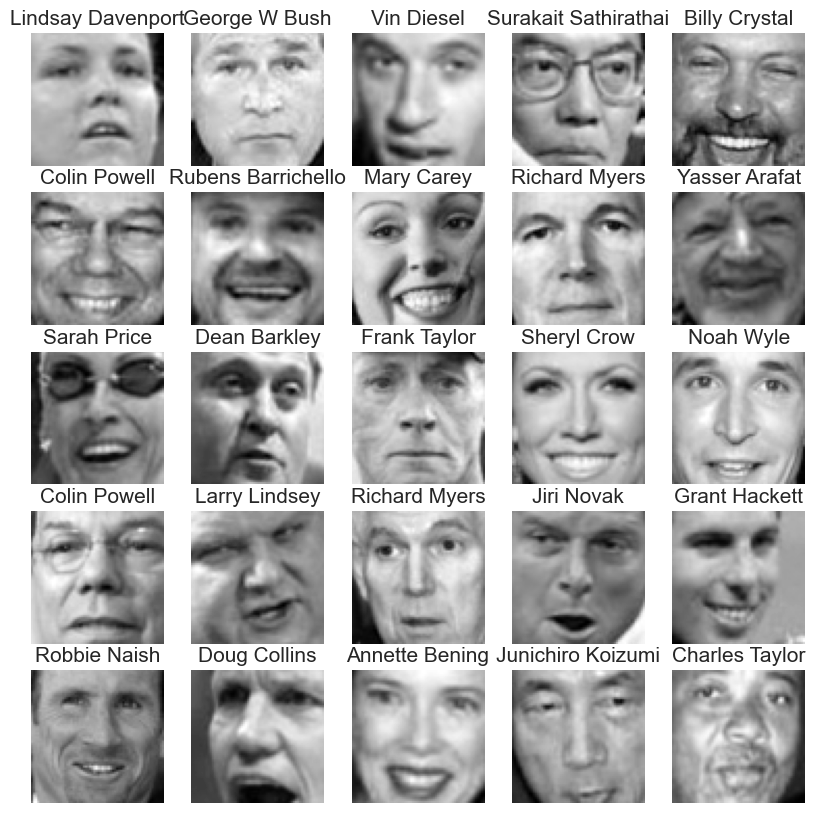

In [204]:
def face_plot(face_imgs, face_names):
    '''Creates a 6x5 grid of grayscale face images.
    
    Parameters:
    -----------
    face_imgs: ndarray. shape=(N, img_y, img_x).
        Grayscale images to show.
    face_names: ndarray. shape=(N,).
        Names of the person in each image represented as strings.
    
    NOTE: Each grayscale image should have a title with the person's name in it.
    '''
    pass
    fig, axes = plt.subplots(5, 5, figsize = (10,10))
    count = 0
    for i in range(5):
        for j in range(5):
            ax = axes[i][j] 
            ax.imshow(face_imgs[count], cmap = plt.get_cmap('gray'))
            ax.set_xticks([])
            ax.set_yticks([])
            ax.set_title(face_names[count], fontsize = 15)
            count = count + 1
    
    plt.show()

face_plot(face_imgs, face_names)

### 4c. Visualize the "mean face"

Take the mean face image across the dataset and show it below.

**Note:** Use the same `cmap` parameter as above and turn off x and y tick marks.

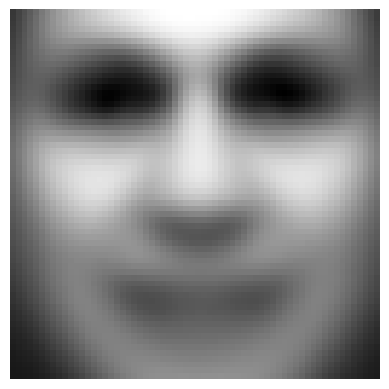

In [6]:
mean_face = np.mean(face_imgs, axis=0)
plt.imshow(mean_face, cmap = plt.get_cmap('gray'))
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
plt.grid(False)
plt.show()

### 4d. Preprocess face data

In the face dataset, each person is a sample and each pixel is a variable. Currently, the face data has shape = `(13231, 64, 64)` or $N = 13231$ samples and $M = 64*64 = 4096$ pixels. To run PCA, we'll need to \"unravel\" each row of pixels and glue them into one big vector so that the shape = `(13231, 64*64)` = `(13231, 4096)`. This will make a standard matrix and should work with your PCA code.


In the following cell, reshape the face data **without hardcoding** ANY of (13231, 64*64)!

In [7]:
# Your reshape code here
samples, height, width = face_imgs.shape
face_imgs_vec = face_imgs.reshape(samples, height*width)
print(f'Your reshaped face images have shape={face_imgs_vec.shape} and it should be (13231, 4096).')

Your reshaped face images have shape=(13231, 4096) and it should be (13231, 4096).


### 4e. Perform PCA on preprocessed face data

Create pandas DataFrame object that holds the face data then run PCA on the face dataset. The header names of consecutive integers `0, 1, ..., 4095` are fine. For the `vars` parameter in the `fit` method, pass in a Python list of ints (`0, 1, ..., 4095`).

**Notes:**
- This is not a "toy" dataset so it might take a few minutes for the PCA to finish computing.
- Use the python `time` module (i.e. `import time`) to time how long the `pca` method takes to finish processing the data, then print out the time elapsed below. If this takes more than a few minutes, something probably is wrong.

In [8]:
face_data = pd.DataFrame(face_imgs_vec, columns = range(height*width))
face_data.head()

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,177.0,180.0,185.0,189.0,191.0,188.0,183.0,181.0,181.0,179.0,...,146.0,150.0,135.0,115.0,95.0,84.0,88.0,91.0,88.0,89.0
1,143.0,138.0,140.0,149.0,171.0,182.0,177.0,177.0,186.0,193.0,...,139.0,118.0,66.0,14.0,10.0,20.0,17.0,13.0,16.0,19.0
2,47.0,47.0,54.0,59.0,65.0,72.0,77.0,80.0,87.0,97.0,...,120.0,113.0,112.0,111.0,110.0,109.0,107.0,105.0,102.0,98.0
3,123.0,122.0,123.0,124.0,121.0,115.0,113.0,113.0,112.0,112.0,...,66.0,67.0,63.0,62.0,60.0,63.0,66.0,59.0,44.0,37.0
4,85.0,99.0,108.0,108.0,105.0,106.0,115.0,130.0,138.0,139.0,...,91.0,103.0,147.0,128.0,123.0,119.0,111.0,109.0,103.0,99.0


In [40]:
import time
from pca import PCA
pca = PCA(face_data)
start_time = time.time()
data = pca.fit(np.arange(0,4096))
end_time = time.time()

print("Time Elapsed: ", end_time - start_time)

Time Elapsed:  108.92852783203125


### 4f. Make face PCA elbow plot

Make an elbow plot of the PCA results. Show **only show a reasonable number of PCs** to focus on the curve before it plateaus.

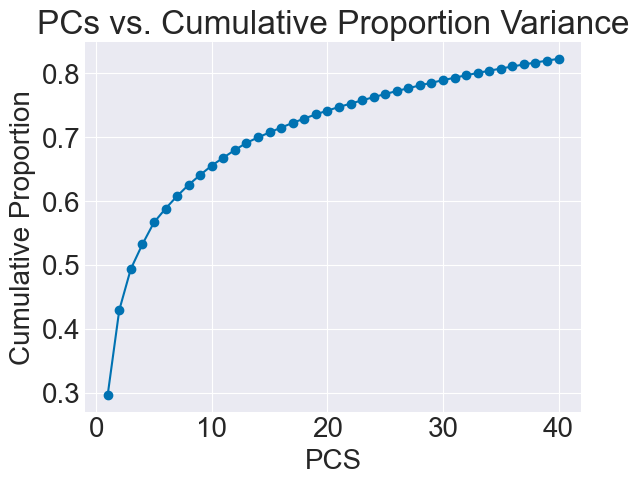

In [50]:
pca.elbow_plot(40)

### 4g. Reconstruct faces using the principal components

Use your elbow plot to find the number of top principal components required to *approximately* explain the following cumulative proportion of the variance:
- 50%
- 70%
- 80%
- 97%

Outline of the general process:
1. For each of the above number of PCs, project them back onto the original data space.
2. Write then use the below `make_imgs` function to convert the projected data back to image shapes `(13231, 64, 64)`.
3. Use `face_plot` to plot the reconstructed 1st 30 faces with each of the variance numbers above.

**There should be 4 6x5 plots below**

In [51]:
def make_imgs(reconstucted_imgs):
    '''Inflates a 1D feature vector representation of images into 2D images for plotting.
    Assumes square images
    
    Parameters:
    -----------
    reconstucted_imgs: ndarray. shape=(N, img_y*img_x)
        1D vector representation of each image
    
    Returns:
    -----------
    ndarray. shape=(N, img_y, img_x)
        The images inflated into 2D
    '''
    img_size = int(np.sqrt(reconstucted_imgs.shape[1]))
    new_shape = np.reshape(reconstucted_imgs, [reconstucted_imgs.shape[0], img_size, img_size])
    return new_shape
    pass
fifty = make_imgs(pca.pca_then_project_back(3))
seventy = make_imgs(pca.pca_then_project_back(15))
eighty = make_imgs(pca.pca_then_project_back(33))
ninety_seven = make_imgs(pca.pca_then_project_back(250))

#### 50% variance face grid

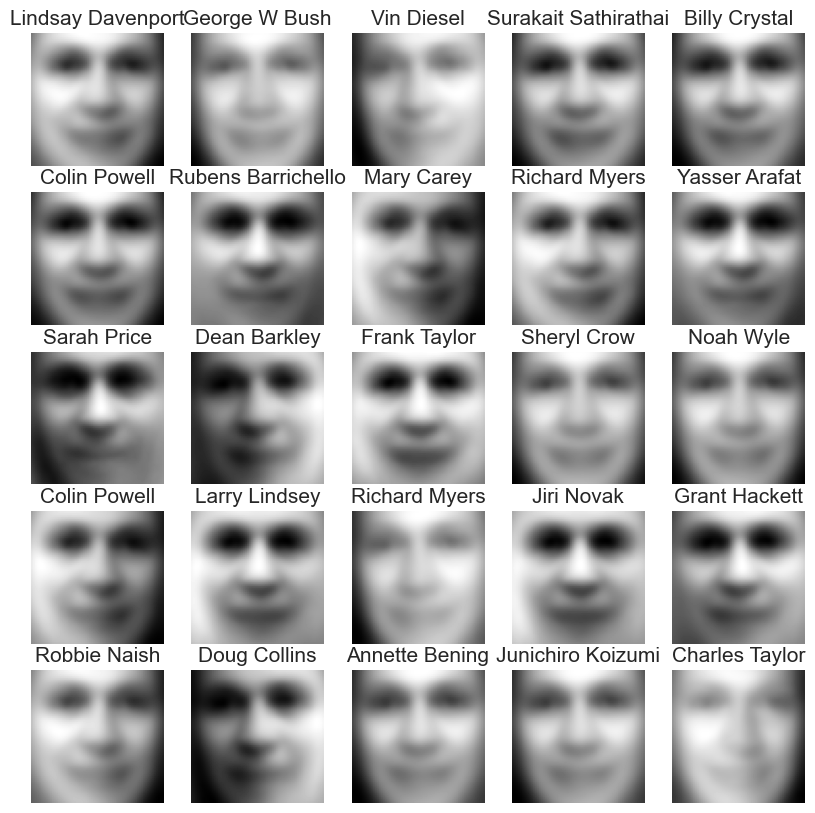

In [52]:
face_plot(fifty, face_names)

#### 70% variance face grid

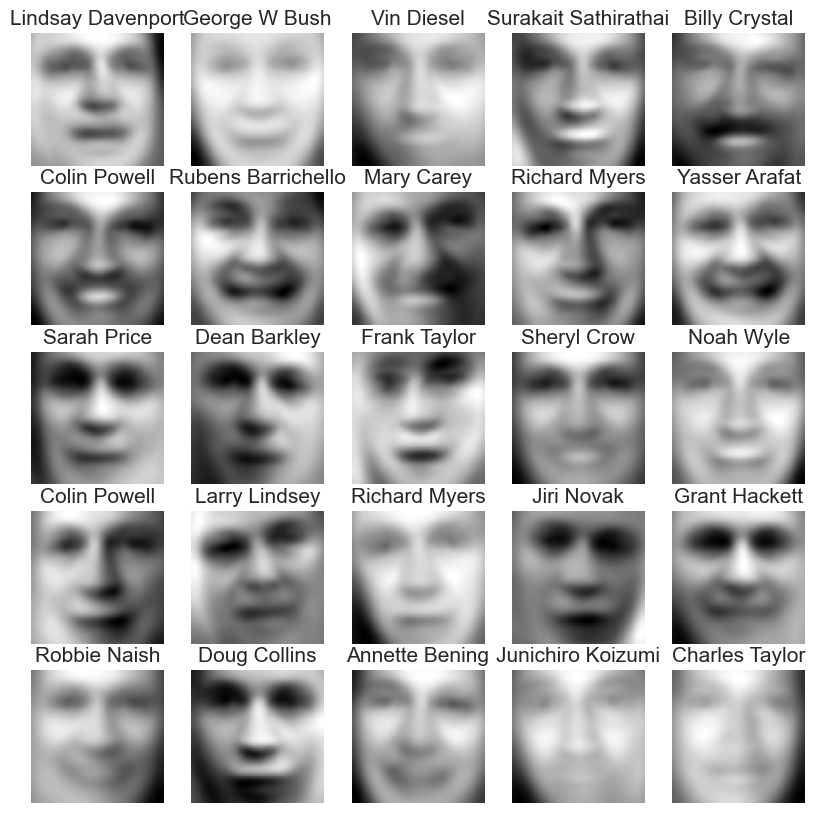

In [44]:
face_plot(seventy, face_names)

#### 80% variance face grid

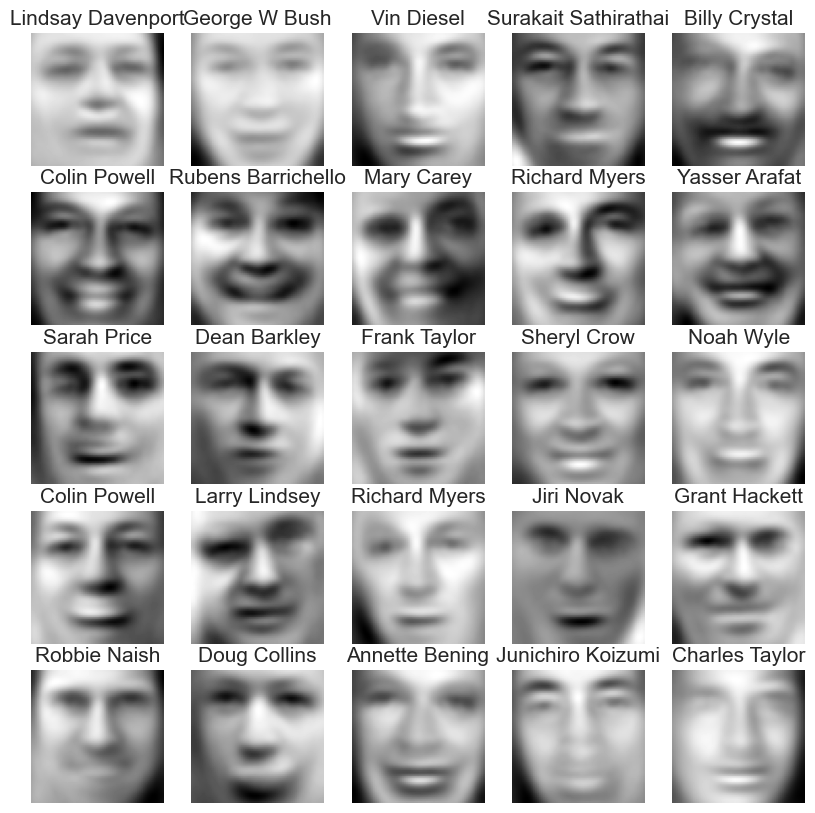

In [45]:
face_plot(eighty, face_names)

#### 97% variance face grid

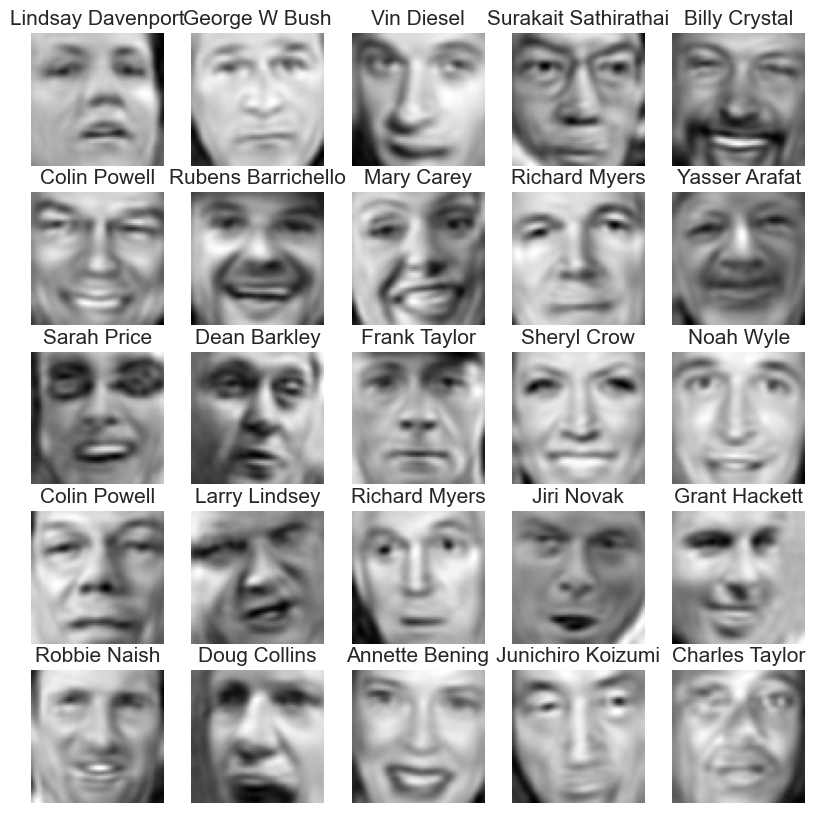

In [53]:
face_plot(ninety_seven, face_names)

### 4h. Questions

**Question 10:** Pick one of the celebrity faces to focus on. Describe what specifically happens in the same celebrity face over the course of the 4 plots.

**Question 11:** Let's assume that the PCA eigenvectors are fixed/fit using the dataset above and we do not change them. Say we are interested in reconstructing of others in the general population (i.e. PCA transforming images of novel people). In a paragraph, describe how well you would expect this to work, noting any concerns you might have. **Reminder: I am expecting 100% original answers to questions that you write 100% yourself. Suspected use of generative AI to write or edit will result in 0 points.** I am grading your ideas, not your style/prose/grammar.



**Answer 10:** Richard Myers looks the closest to the mean face (which by the way, is absolutely terrifying) when it's at 50% variance. As the variance increases, it becomes more and more like his actual face. we can see the recognizable headtilt in the 70% grid for example, it's a slight progression.

**Answer 11:** I think it would probably be okay, given the sample size is pretty small but somewhat variant. Everyone's got a different face so it's kind of hard to make an "average" of the whole thing. Other cultures have varying facial structures that we might want to take into account. If we wanted to apply this to a general population I believe it would be better to probably have a bigger sample size to account for more of a variety of faces. This also may be pretty variant because we can't guarantee that everyone's picture is going to be perfectly aligned too, forehead to chin, as we can see with some people like Doug Colins. We also can't guarantee that people will be smiling, so it's tough. Age groups are also a big concern. An overarching concern is that even if we were to apply all this, the run time would definitely not be great... but it's a sacrifice you need to do...



## Extensions

### a. Reminder: AI Policy

The goal of extensions is to learn and create something new beyond the base project that excites you. To serve this goal and out of fairness to your hardworking classmates, **AI (e.g. ChatGPT, Copilot, etc.) should NOT be used in ANY way on this project and extensions.** This includes both written analysis, plotting, and code. We will only grade **your** work, not an AI's. **We will stop grading your project if we notice AI-generated content (to any capacity).**

### b. Guidelines

To receive credit for any extension, you must:
1. Not modify / prevent any code from the core project from working (e.g. make a copy before changing). In other words, **the notebook test code should still work!**
2. **You must describe what you did and what you found in detail**. This includes a summary of parameter values used in your simulations.
3. Include (*labeled!*) plots and/or numbers to present your results.
4. Write up your extensions below or in a separate notebook.
5. Give kudos to all sources, including anyone that you consulted.

### c. Suggestions

**Rule of thumb: one deep, thorough extension is worth more than several quick, shallow extensions!**

The ideas below are **suggested** extensions — feel free to go in another direction related to this project that is not listed!

### 1. Your own dataset

- Do PCA on a dataset of your choice. Use any of the canonical analysis tools (e.g. elbow plot, proportion variance explained, loading plot, etc) to inform your analysis and exploration. 

### 2. Image compression

- Run PCA on your own images and analyze the trade-off in compression and reconstruction error.

### 3. Facial recognition with Eigenfaces

You can use Eigenfaces to perform facial recognition! Here is the idea:

1. Perform PCA on images of faces of people who you would like to be able to "learn" to recognize (creating a "database" of known faces). This is just like what you did in the main project.
2. Project a "query" image of a face that you would like to recognize into the PCA space established by the database of known faces (the number of PCA dimensions is up to you).  
3. Project each of the images in the face database into the same PCA space established by the database of known faces (the number of PCA dimensions is the same as before).
4. Treat the projected query image and each projected database images as vectors. Compute the Euclidean distance of the vector obtained by subtracting that of the query image and that of each database image.
5. Pick a match tolerance level. If any of the distances is less than your tolerance level, you have a match! If none of the distances is smaller than your tolerance, you don't have a match.

# Part 1: Image Compression

A while ago I drew a bunch of my friends for a passion project, and curiously I was wondering if there was any similarities that can be found in the faces I drew for each facial drawing, just like we did throughout this project!

For the sake of time complexity, I cropped all the faces in the drawing, made them lower resolution, black and white, and then shrunk them to be the exact same dimensions. Obviously some poeple got their heads cropped but it's to be expected. Here's what they looked like:

(60, 60)
(60, 60)
(60, 60)
(60, 60)
(60, 60)
(60, 60)
(60, 60)
(60, 60)
(60, 60)
(60, 60)
(60, 60)
(60, 60)
(60, 60)


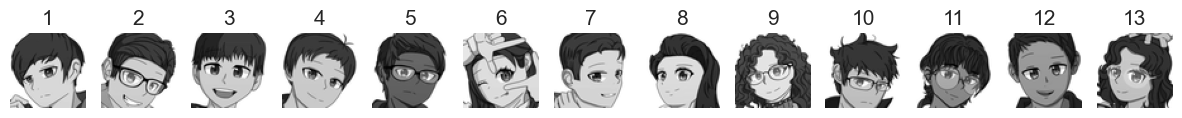

In [215]:
fig, axes = plt.subplots(1, 13, figsize = (15,15))
count = 1
face_imgs = []
for j in range(13):
    ax = axes[j] 
    img = plt.imread('data/resized/' + str(count) + '.png')
    face_imgs.append(np.array(img))
    ax.imshow(img, cmap = plt.get_cmap('gray'))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(count, fontsize = 15)
    count = count + 1
face_imgs = np.array(face_imgs)
plt.show()

Let's observe the "mean face", however how cursed that may be...

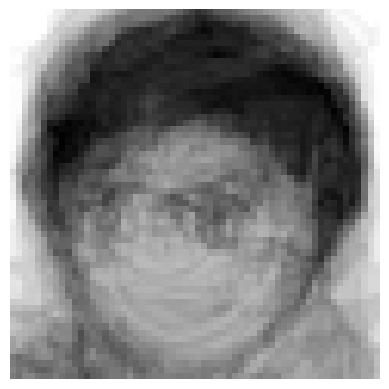

In [154]:
mean_face = np.mean(face_imgs, axis=0)
plt.imshow(mean_face, cmap = plt.get_cmap('gray'))
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
plt.grid(False)
plt.show()

I'm actually surprised you can make out somewhat of a figure, although it isn't as recognizable as the real celebrities. You can at least make out a head, hair and neck shape, but the facial features are all jambled up, which isn't surprising, as the information I fed it had images that had many angles and face shapes.

Now let's see what it looks like when you run PCA on it! To do this, let's follow the same steps as before, and print the elbow plot. I'll also print the time elapsed to do the PCA as well, since I'm pretty sure I resized them to be 60x60, which is smaller than 64x64, so optimally this should take a lesser time.

In [177]:
samples, height, width = face_imgs.shape
face_imgs_vec = face_imgs.reshape(samples, height*width)

face_data = pd.DataFrame(face_imgs_vec, columns = range(height*width))

import time
from pca import PCA
art_pca = PCA(face_data)
start_time = time.time()
data = art_pca.fit(np.arange(0,3600))
end_time = time.time()

print("Time Elapsed: ", end_time - start_time)

Time Elapsed:  65.99375915527344


For some reason, the covariance matrix is actually giving me complex numbers, so I had to call numpy.real to change it!

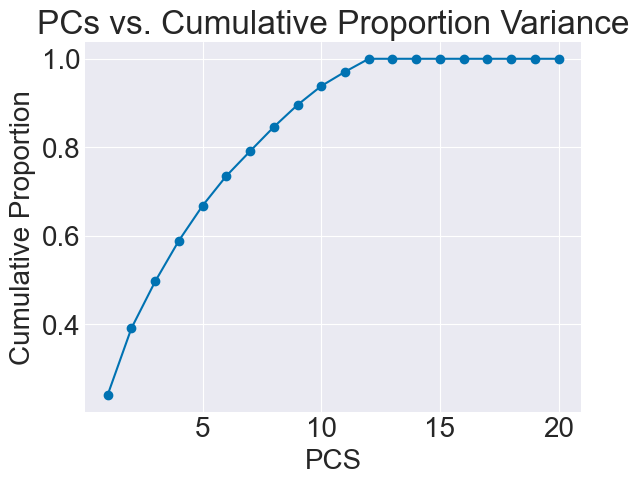

In [178]:
art_pca.elbow_plot(20)

Interesting, not as many PCs to worry about as the real life version, so let's compare the transformation when keeping some variances!

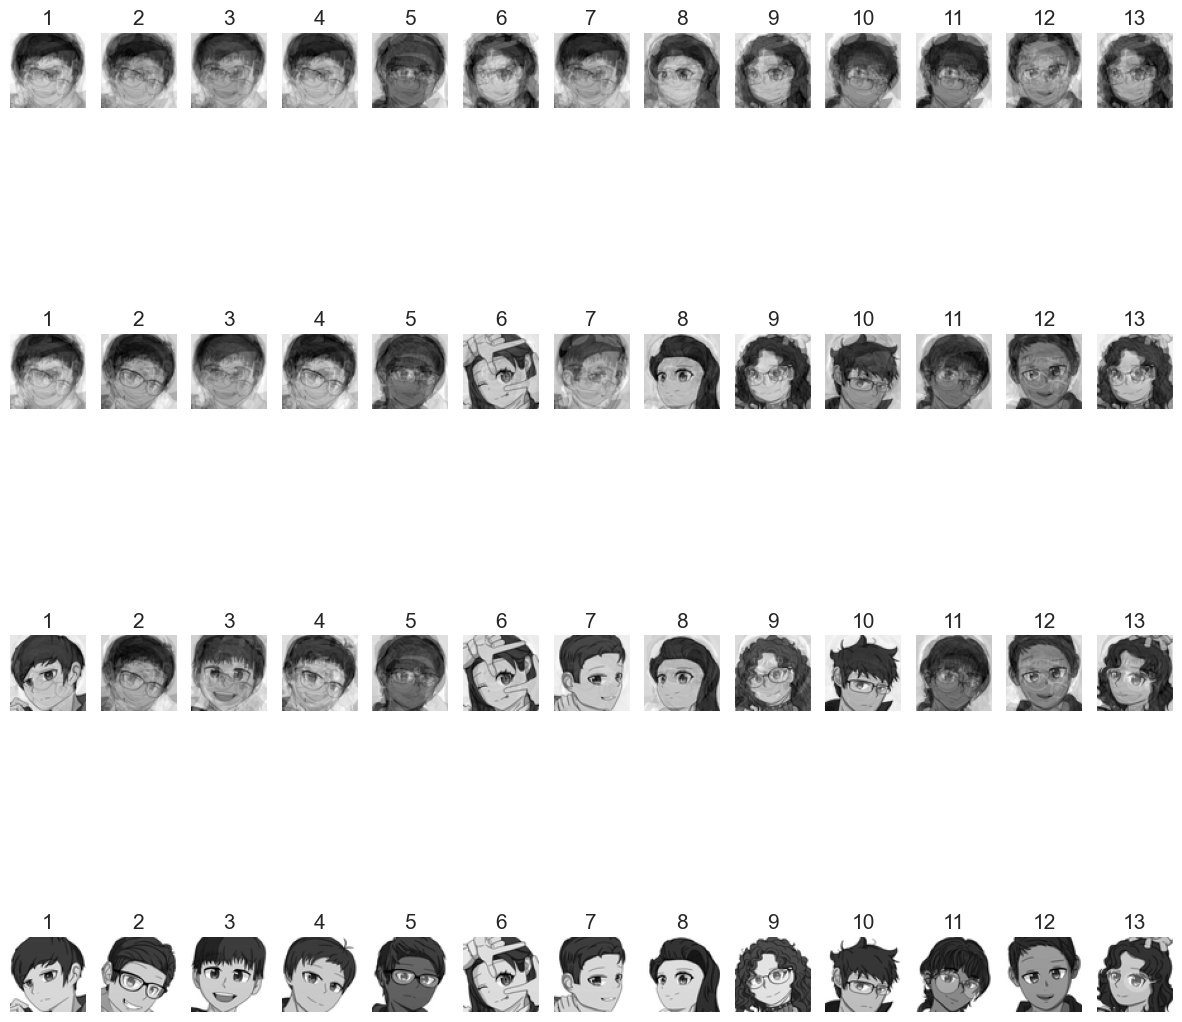

In [181]:
fig, axes = plt.subplots(4, 13, figsize = (15,15))
count = 1
pcas_to_keep = [3,6,9,12]
for i in range(4):
    count = 1
    thing = (make_imgs(art_pca.pca_then_project_back(pcas_to_keep[i])))
    for j in range(13):
        ax = axes[i][j] 
        ax.imshow(thing[j], cmap = plt.get_cmap('gray'))
        #store for later use
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(count, fontsize = 15)
        count = count + 1
plt.show()

Surprisingly, #6 looks very recognizable at around 75% variance, which I thought it was weird as I thought it itself looked the most different from all the other faces seeing as it had hands infront of it. Then again, these faces are pretty hard to find an average of because all the angles are different, but on my end, I think that's a good thing. If anything, I would try to get drawings that have similar shape, but I don't have that on me...

# Part 2: Facial Recognition

Because, why not? I would like to see if an algorithm can recognize Mr.Beast amidst other YouTube faces, because it's funny. To do this, I will format the rest of this extension based on the steps outlined.

### 1. Perform PCA on images of faces of people who you would like to be able to "learn" to recognize (creating a "database" of known faces). This is just like what you did in the main project.

Here's a bunch of faces of YouTubers compressed to 64x64 monochrome icons, with one my friends added as, in the end it shouldn't really matter that much because a youtuber's face is just as different as a non youtuber's.

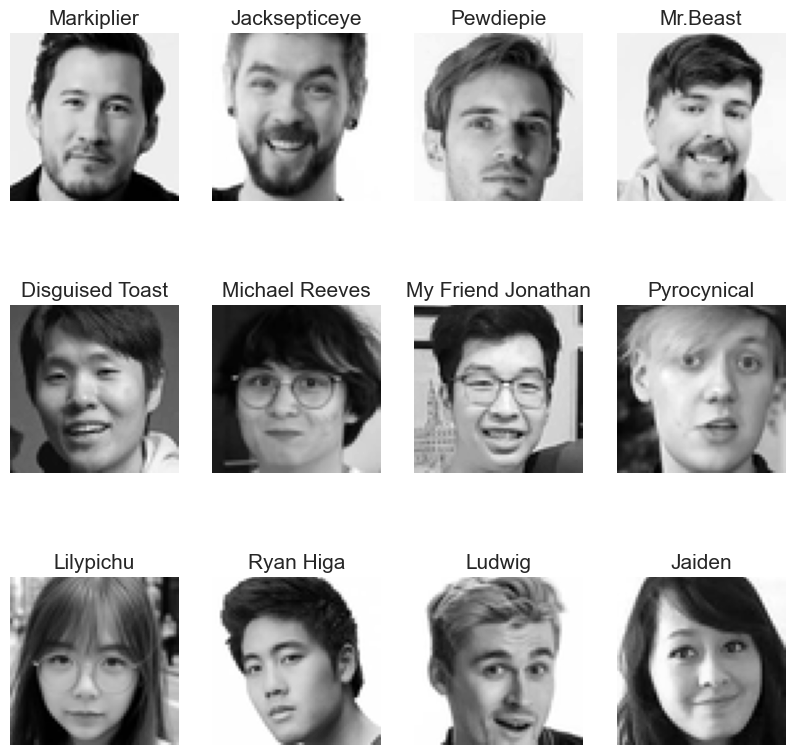

In [217]:
fig, axes = plt.subplots(3, 4, figsize = (10,10))
names = ['Markiplier', 'Jacksepticeye', 'Pewdiepie', 'Mr.Beast', 'Disguised Toast', 'Michael Reeves', 'My Friend Jonathan', 'Pyrocynical', 'Lilypichu', 'Ryan Higa', 'Ludwig', 'Jaiden']
yt_imgs = []
count = 1
for i in range(3):
    for j in range(4):
        ax = axes[i][j] 
        img = plt.imread('data/youtubers/' + str(count) + '.png')[:,:,0]
        yt_imgs.append(np.array(img))
        ax.imshow(img,cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(names[count-1], fontsize = 15)
        count = count + 1
yt_imgs = np.array(yt_imgs)
plt.show()

Here's the mean face:

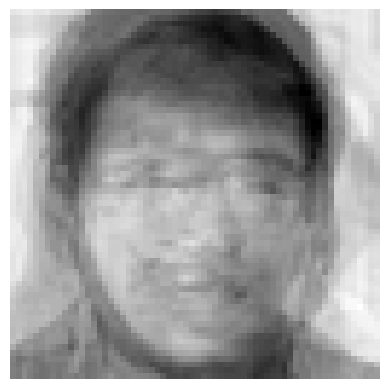

In [218]:
mean_face = np.mean(yt_imgs, axis=0)
plt.imshow(mean_face, cmap = plt.get_cmap('gray'))
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
plt.grid(False)
plt.show()

In [237]:
samples, height, width = yt_imgs.shape
yt_imgs_vec = yt_imgs.reshape(samples, height*width)

yt_data = pd.DataFrame(yt_imgs_vec, columns = range(height*width))

import time
from pca import PCA
yt_pca = PCA(yt_data)
start_time = time.time()
data = yt_pca.fit(np.arange(0,4096))
end_time = time.time()

print("Time Elapsed: ", end_time - start_time)

Time Elapsed:  111.86386203765869


### 2. Project a "query" image of a face that you would like to recognize into the PCA space established by the database of known faces (the number of PCA dimensions is up to you).  


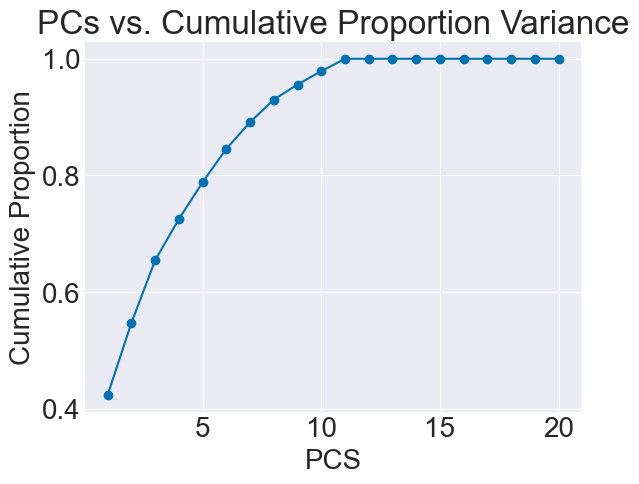

In [238]:
yt_pca.elbow_plot(20)

Let's just go with a standard proportion of 90%, which looks like roughly 7 PCs.

Here's the other image of Mr.Beast that I would like the algorithm to recognize:

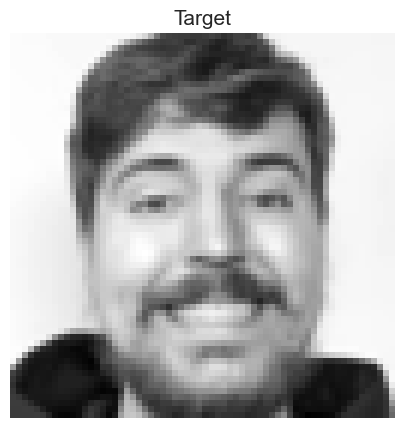

In [240]:
fig, axes = plt.subplots(1, 1, figsize = (5,5))
target = plt.imread('data/youtubers/13.png')
#store for later use
target = np.array(target)
ax = axes
ax.imshow(target, cmap = plt.get_cmap('gray'))



ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Target', fontsize = 15)
plt.show()

Taking the eigenvectors and values from the database...

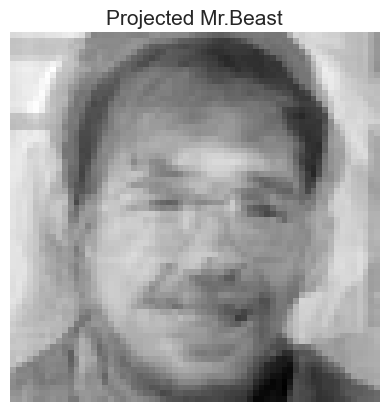

In [255]:
height, width = target.shape
target_vec = target.reshape(height*width)

list = []
for i in range(7):
    list.append(i)
P = yt_pca.e_vecs[:, list]
# print(yt_pca.A.shape)
A_centered = target_vec - np.mean(yt_pca.A, axis = 0)
pca_proj = A_centered @ P
yt_pca.A_proj = pca_proj

projected_target = pca_proj @ P.T + np.mean(yt_pca.A, axis = 0)
projected_target = np.reshape(projected_target, [64,64])
# print(projected_data.shape)
plt.imshow(projected_target, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('Projected Mr.Beast', fontsize = 15)
plt.show()

### 3. Project each of the images in the face database into the same PCA space established by the database of known faces (the number of PCA dimensions is the same as before).


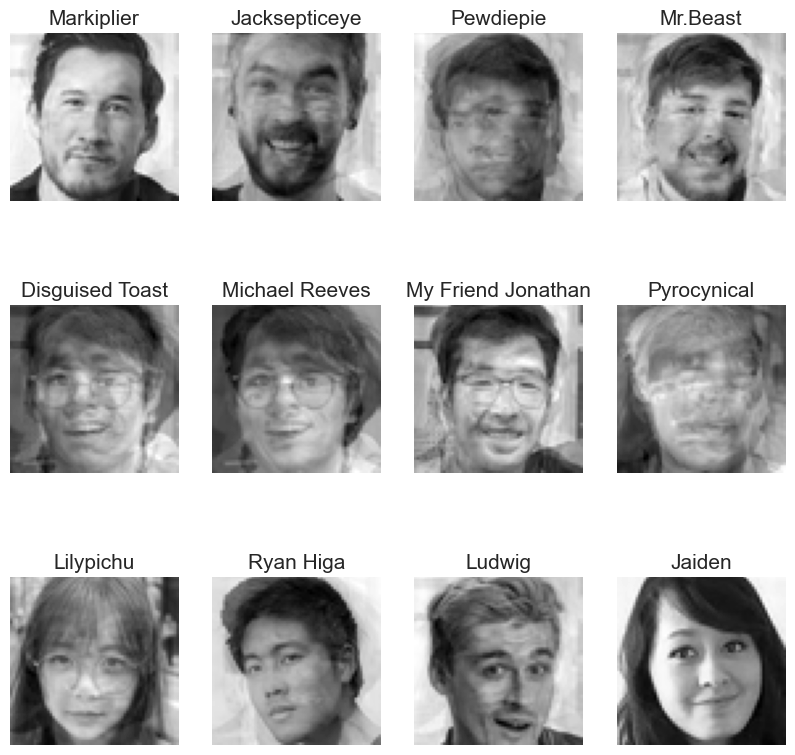

In [257]:
fig, axes = plt.subplots(3, 4, figsize = (10,10))
count = 0
for i in range(3):
    yt_projections = (make_imgs(yt_pca.pca_then_project_back(7)))
    for j in range(4):
        ax = axes[i][j] 
        ax.imshow(yt_projections[count], cmap = plt.get_cmap('gray'))
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(names[count], fontsize = 15)
        count = count + 1
plt.show()

### 4. Treat the projected query image and each projected database images as vectors. Compute the Euclidean distance of the vector obtained by subtracting that of the query image and that of each database image.


In [264]:
differences = []
for i in range(12):
    differences.append(np.linalg.norm(projected_target - yt_projections[i]))
print(differences)

[13.2758, 18.635374, 10.636137, 11.357475, 20.13145, 26.659174, 12.178593, 18.553617, 19.719748, 18.204405, 16.099724, 19.550508]


### 5. Pick a match tolerance level. If any of the distances is less than your tolerance level, you have a match! If none of the distances is smaller than your tolerance, you don't have a match.

Judging by the list, it looks like the target picture actually looks more like Pewdiepie (index 3), as the difference between it and his picture is the lowest, with the second lowest being his actual picture (index 4), which is odd, but close enough. Obviously there are many things to account for when looking at photos of people, especially because the ones I chose are pretty varient in background, angle and expression. People's head shapes also vary, so while it wasn't the most accurate, it got close enough!

## KUDOS

As always, thanks to Professor Layton for checking my work, as I wasn't confident if the results I was getting was actually to be expected, but he helped give me an understanding!